# Detecção Facial Tenoria

In [1]:
!ls /usr/local/share/opencv4/haarcascades

haarcascade_eye.xml
haarcascade_eye_tree_eyeglasses.xml
haarcascade_frontalcatface.xml
haarcascade_frontalcatface_extended.xml
haarcascade_frontalface_alt.xml
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_alt_tree.xml
haarcascade_frontalface_default.xml
haarcascade_fullbody.xml
haarcascade_lefteye_2splits.xml
haarcascade_licence_plate_rus_16stages.xml
haarcascade_lowerbody.xml
haarcascade_profileface.xml
haarcascade_righteye_2splits.xml
haarcascade_russian_plate_number.xml
haarcascade_smile.xml
haarcascade_upperbody.xml


In [4]:
import io
import PIL.Image
import IPython
import cv2
import os
import numpy as np
from IPython.display import Image, display, clear_output

## 1. Face Detection

In [5]:
# Load the cascade
classifier_folder = '/usr/local/share/opencv4/haarcascades/'
classifier_path = os.path.join(classifier_folder, 'haarcascade_frontalface_default.xml')
classifier_path2 = os.path.join(classifier_folder, 'haarcascade_eye.xml')
classifier_path3 = os.path.join(classifier_folder, 'haarcascade_smile.xml')
face_cascade = cv2.CascadeClassifier(classifier_path)
eye_cascade = cv2.CascadeClassifier(classifier_path2)
smile_cascade = cv2.CascadeClassifier(classifier_path3)
print(eye_cascade.empty())

False


In [6]:
# function for rendering an array as an image
def showarray(a, fmt='jpeg'):
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue())) 

In [7]:
# Read the input image
img = cv2.imread("friends1.png")

In [8]:
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

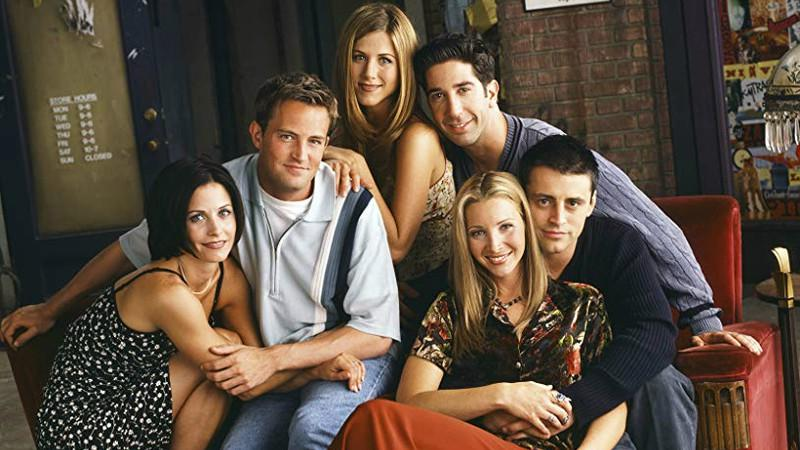

In [9]:
# Normal color
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
showarray(img_rgb)

In [10]:
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.37, 5)

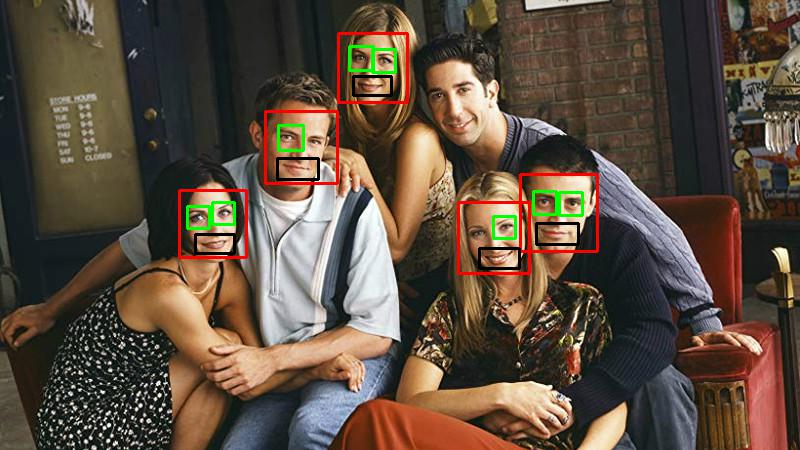

In [11]:
# Draw rectangle around the faces
for (x,y,w,h) in faces:
    img = cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    smile = smile_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    for (sx,sy,sw,sh) in smile:
        cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,0),2)
showarray(img)